In [8]:
import numpy as np
from matplotlib import pyplot as pp
%matplotlib inline

In [9]:
L = 0.01
nx,ny = 21,21
dx = L / (nx - 1)
dy = L / (ny - 1)

x = np.linspace(0.0, L, num = nx)
y = np.linspace(0.0, L, num = ny)

alpha = 1e-4

T0 = np.full([ny,nx],20.0)
T0[0,:] = 100.0
T0[:,0] = 100.0

In [10]:
def ftcs(T0, nt, dt, dx, dy, alpha, qx=0.0, qy=0.0):
    T = T0.copy()
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    ny,nx = T.shape
    I, J = nx//2, ny//2
    for n in range(nt):
        T[1:-1,1:-1] = (T[1:-1,1:-1] + 
                        sigma_x * (T[1:-1,:-2] - 2 * T[1:-1,1:-1] + T[1:-1,2:]) +
                        sigma_y * (T[:-2,1:-1] - 2 * T[1:-1,1:-1] + T[2:,1:-1]))
        T[:,-1] = T[:,-2] + dx * qx
        T[-1,:] = T[-2,:] + dy * qy
        if T[J,I] >= 70:
            break
    print(n+1, T[J, I])
    return T

In [11]:
nt = 500
sigma = 0.25
dt = sigma * min(dx,dy)**2 / alpha

T = ftcs(T0, nt, dt, dx, dy, alpha)

256 70.02138294076661


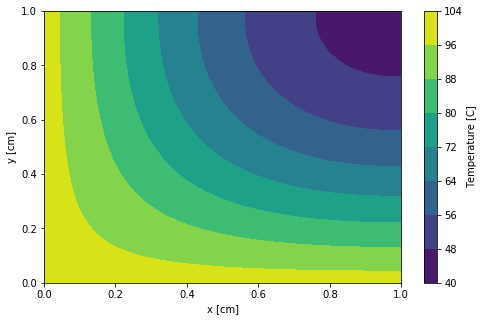

In [17]:
pp.figure(figsize=(8.0,5.0))
pp.xlabel('x [cm]')
pp.ylabel('y [cm]')
contf = pp.contourf(x*100, y*100, T)
cbar = pp.colorbar(contf)
cbar.set_label('Temperature [C]')